# Coursework #7 - Visualization Project
Guillermo A. R.
27/03/2024

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.animation import FuncAnimation
import scipy.io.wavfile as wav
import IPython.display as ipd
from bokeh.palettes import Magma256
plt.style.use('bmh')
%matplotlib widget

In [2]:
# import audio
fname = 'in_my_life.wav'
srate, audio = wav.read(fname)
# convert to float
audio = audio.astype(np.float32) / 32767.0
# if audio is mono make it stereo
if audio.shape[1] == 1:
    left = audio
    audio = np.zeros((len(audio), 2))
    audio[:,0] = left
    audio[:,1] = left

# normalize
audio[:,0] = audio[:,0] / np.max(np.abs(audio[:,0])) * 0.98
audio[:,1] = audio[:,1] / np.max(np.abs(audio[:,1])) * 0.98

In [3]:
ipd.Audio(audio.T, rate=srate)

In [4]:
FPS = 30
interval = 1e3 / FPS
SAMPLESIZE = int(interval / 1e3 * srate)
# Pad audio at end to match desired samplesize
audio = np.pad(audio, (0, SAMPLESIZE -  len(audio[:,0]) % SAMPLESIZE))
SAMPLEVIEW = SAMPLESIZE * 40
NBFRAMES = int( len(audio) / SAMPLESIZE - SAMPLEVIEW / SAMPLESIZE )
x = np.arange(SAMPLEVIEW) / srate

print('frames per second: ' +str(FPS))
print('interval between frames: ' +str(interval) + ' [ms]')
print('Total number of frames: ' + str(NBFRAMES) + ' frames')
print('Samples per frame: ' + str(SAMPLESIZE) + ' samples')

frames per second: 30
interval between frames: 33.333333333333336 [ms]
Total number of frames: 527 frames
Samples per frame: 1470 samples


In [17]:
# audio processing so animation only addresses memory
segmentsL = []
segmentsR = []
colorsL = []
colorsR = []

for i in range(NBFRAMES):
    # Slice audio to display
    y1 = audio[i*SAMPLESIZE:i*SAMPLESIZE + SAMPLEVIEW, 0]
    # Convert into line collection
    points = np.array([x, y1]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    segmentsL.append(segments)

    # Slice audio to display
    y2 = audio[i*SAMPLESIZE:i*SAMPLESIZE + SAMPLEVIEW, 1]
    # Convert into line collection
    points = np.array([x, y2]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    segmentsR.append(segments)

    # Assign a color to each point
    # that corresponds to the amplitude
    # of the envelope
    tempL = np.abs(y1) * (len(Magma256)-1)
    tempL = np.array(Magma256)[tempL.astype(int)]
    tempR = np.abs(y2) * (len(Magma256)-1)
    tempR = np.array(Magma256)[tempR.astype(int)]

    colorsL.append(tempL)
    colorsR.append(tempR)
    

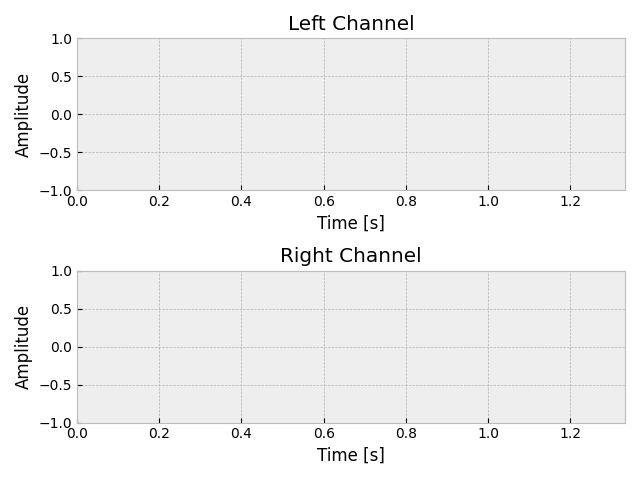

In [18]:
# set up plotting
fig, (ax1, ax2) = plt.subplots(2, 1)
# ax1 = plt.axes(xlim=(0, SAMPLEVIEW/srate), ylim=(-1, 1))
ax1.set_title('Left Channel')
ax1.set_xlabel('Time [s]')
ax1.set_ylim((-1., 1.))
ax1.set_ylabel('Amplitude')
line1 = LineCollection([])
ax1.add_collection(line1)

# ax2 = plt.axes(xlim=(0, SAMPLEVIEW/srate), ylim=(-1, 1))
ax2.set_title('Right Channel')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Amplitude')
ax2.set_ylim((-1., 1.))
line2 = LineCollection([])
ax2.add_collection(line2)

ax1.set_xlim((x[0], x[-1]))
ax2.set_xlim((x[0], x[-1]))

colors = []

# methods for animation
def init():
    line1.set_segments([])
    line2.set_segments([])
    return line1, line2,

def animate(i, line1, line2):
    # Add segments to object
    line1.set_segments(segmentsL[i])
    line2.set_segments(segmentsR[i])
    # Add color for every point
    line1.set_color(colorsL[i])
    line2.set_color(colorsR[i])
    return line1, line2

# create animation
ani = FuncAnimation(fig, animate, fargs=[line1, line2], init_func=init, frames=NBFRAMES, interval=interval, blit=True)
plt.tight_layout()
plt.show()

In [19]:
# save animation, this will stop the interactive plot
# ani.save('test.mp4', codec='h264', writer='ffmpeg')
ani.save('test.gif', writer='imagemagick', fps=FPS)

MovieWriter imagemagick unavailable; using Pillow instead.
